In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pathlib
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

print("PROJECT_DIR", PROJECT_DIR := pathlib.Path.cwd())
print("DATA_DIR", DATA_DIR := PROJECT_DIR / "data")

PROJECT_DIR /home/uzunb/Projects/municipality-bus-utilization-forecasting
DATA_DIR /home/uzunb/Projects/municipality-bus-utilization-forecasting/data


In [7]:
# Read the data
df = pd.read_csv(DATA_DIR / 'municipality_bus_utilization.csv')
df.head()

,timestamp,municipality_id,usage,total_capacity
0,2017-06-04 07:59:42,9,454,1332
1,2017-06-04 07:59:42,8,556,2947
2,2017-06-04 07:59:42,4,1090,3893
3,2017-06-04 07:59:42,0,204,2813
4,2017-06-04 07:59:42,7,718,2019


## EXPLORATORY DATA ANALYSIS

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13070 entries, 0 to 13069
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   timestamp        13070 non-null  object
 1   municipality_id  13070 non-null  int64 
 2   usage            13070 non-null  int64 
 3   total_capacity   13070 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 408.6+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
municipality_id,13070.0,4.500000,2.872391,0.0,2.0,4.5,7.0,9.0
usage,13070.0,876.002984,679.287109,11.0,403.0,692.0,1190.0,3508.0
total_capacity,13070.0,1972.800000,1144.074782,397.0,697.0,1974.5,2947.0,3893.0


In [11]:
df.isnull().sum()

timestamp          0
municipality_id    0
usage              0
total_capacity     0
dtype: int64

In [16]:
df['municipality_id'].value_counts().sort_index()

municipality_id
0    1307
1    1307
2    1307
3    1307
4    1307
5    1307
6    1307
7    1307
8    1307
9    1307
Name: count, dtype: int64

In [24]:
df['total_capacity'].value_counts().sort_index()

total_capacity
397     1307
587     1307
697     1307
1332    1307
1930    1307
2019    1307
2813    1307
2947    1307
3113    1307
3893    1307
Name: count, dtype: int64

In [57]:
grouped_df = df.groupby('municipality_id').agg({'usage': 'mean', 'total_capacity': 'mean'})
grouped_df

,usage,total_capacity
municipality_id,,
0,550.563122,2813.0
1,298.071155,397.0
2,486.994644,697.0
3,1078.263963,1930.0
4,2306.508799,3893.0
5,171.479725,587.0
6,1025.820964,3113.0
7,1149.288447,2019.0
8,1021.745218,2947.0


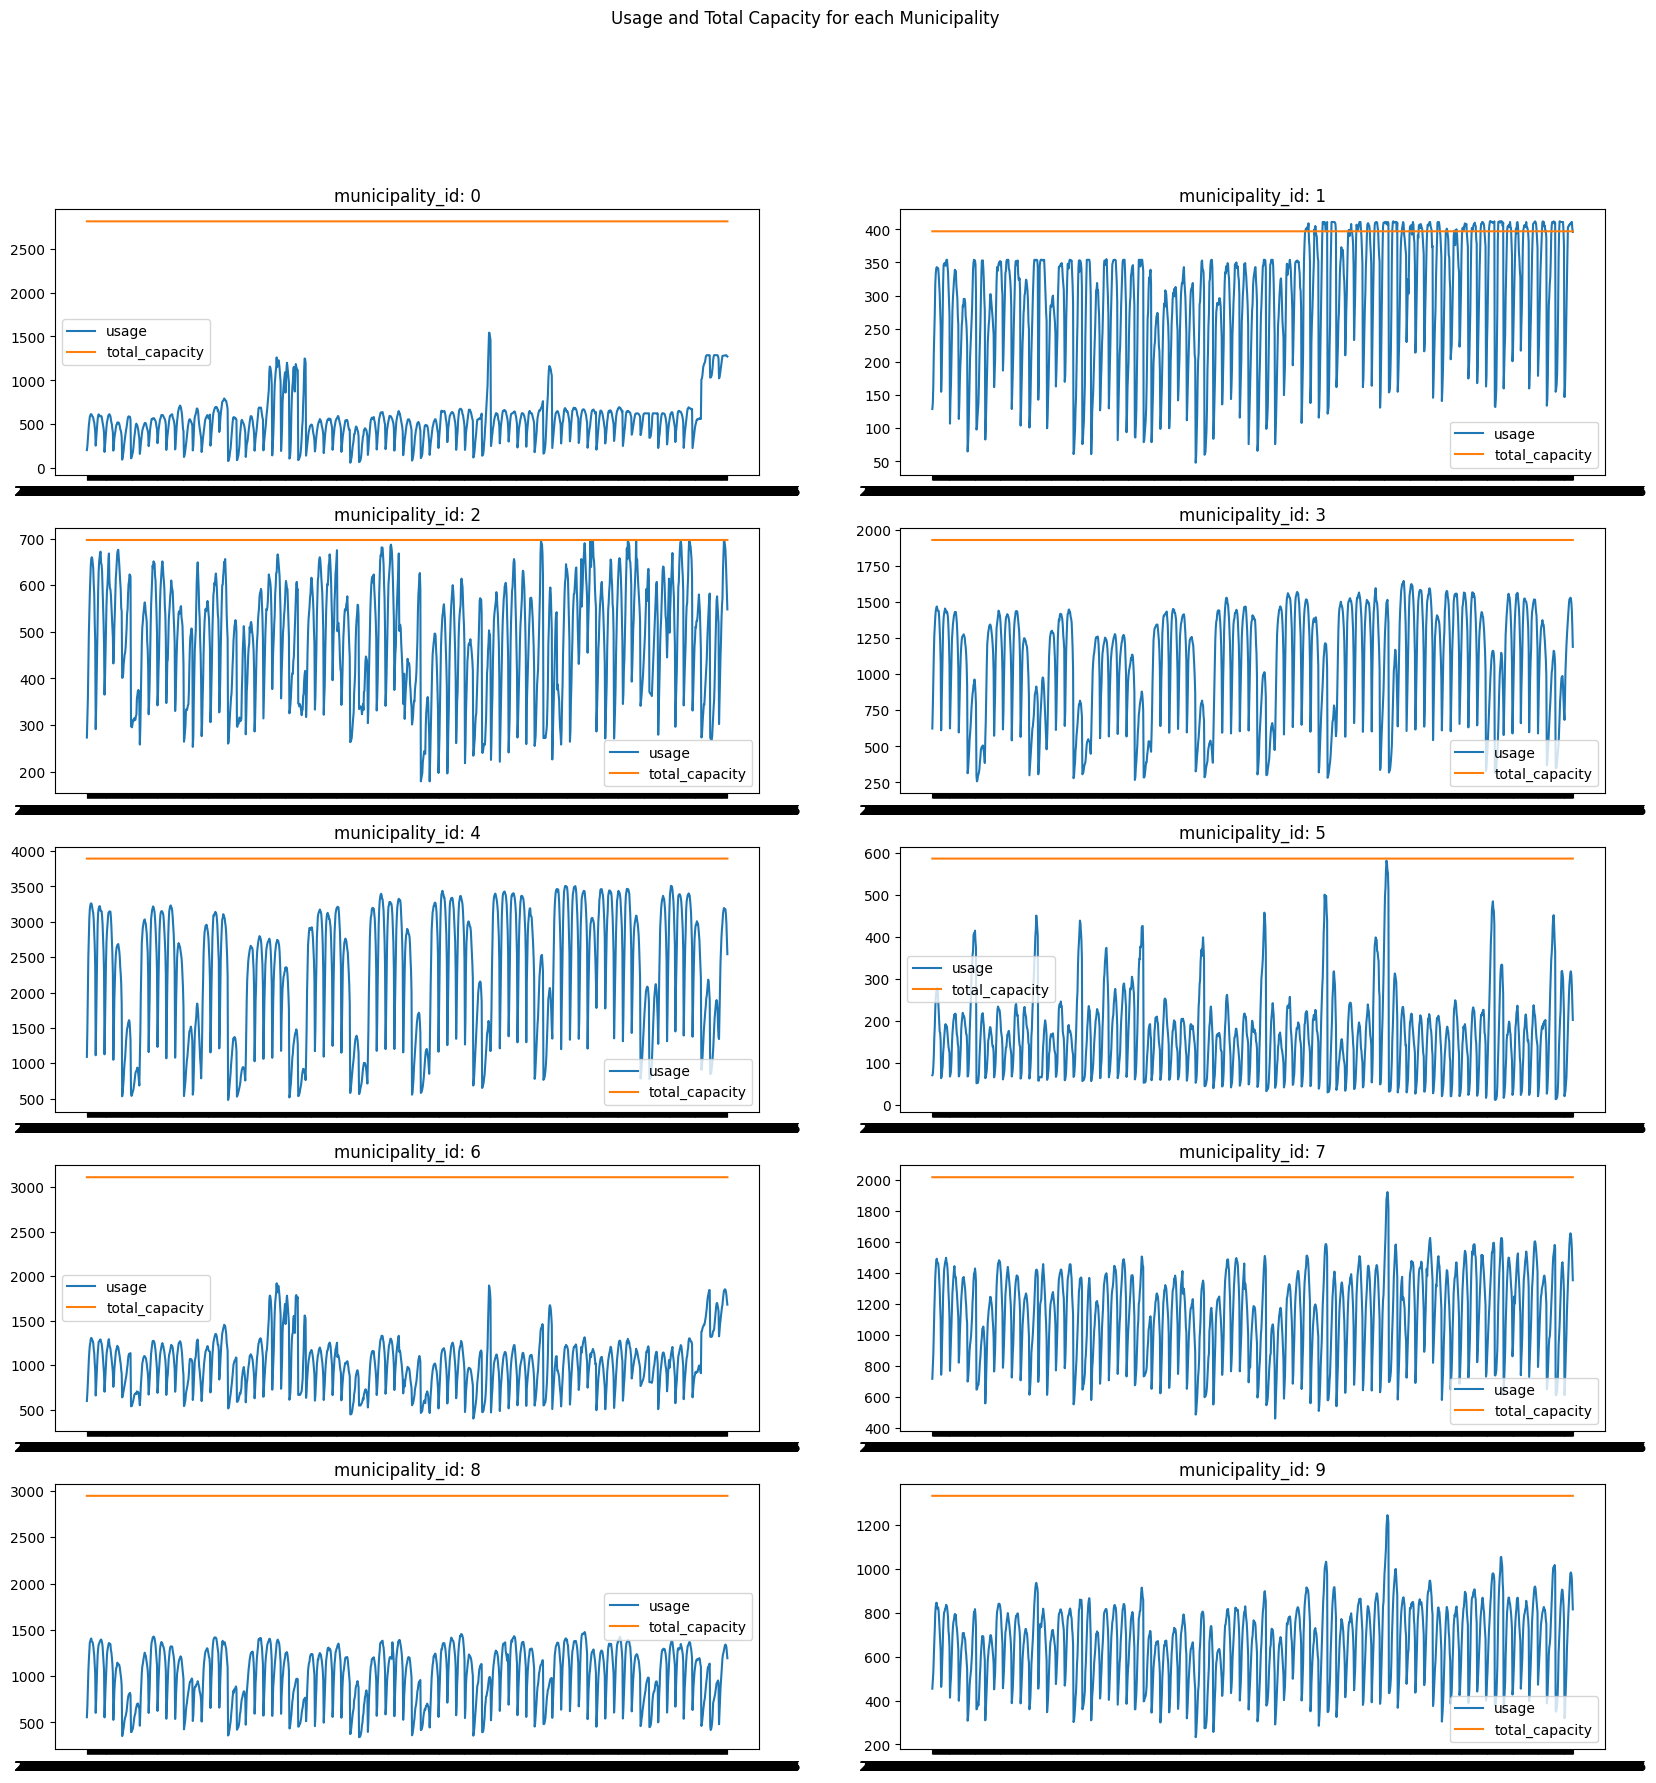

In [88]:
# plot line chart matrix of usage and total capacity due to timestamp for each municipality
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
fig.suptitle("Usage and Total Capacity for each Municipality")
for i, municipality_id in enumerate(grouped_df.index):
    ax = axes[i // 2, i % 2]
    ax.plot(df[df['municipality_id'] == municipality_id]['timestamp'], df[df['municipality_id'] == municipality_id]['usage'], label='usage')
    ax.plot(df[df['municipality_id'] == municipality_id]['timestamp'], df[df['municipality_id'] == municipality_id]['total_capacity'], label='total_capacity')
    ax.set_title(f"municipality_id: {municipality_id}")
    ax.legend()
plt.show()



,usage,total_capacity,usage_percentage
municipality_id,,,
1,298.071155,397.0,75.080896
2,486.994644,697.0,69.870107
4,2306.508799,3893.0,59.247593
7,1149.288447,2019.0,56.923648
3,1078.263963,1930.0,55.868599
9,671.293803,1332.0,50.397433
8,1021.745218,2947.0,34.670689
6,1025.820964,3113.0,32.952810
5,171.479725,587.0,29.212900


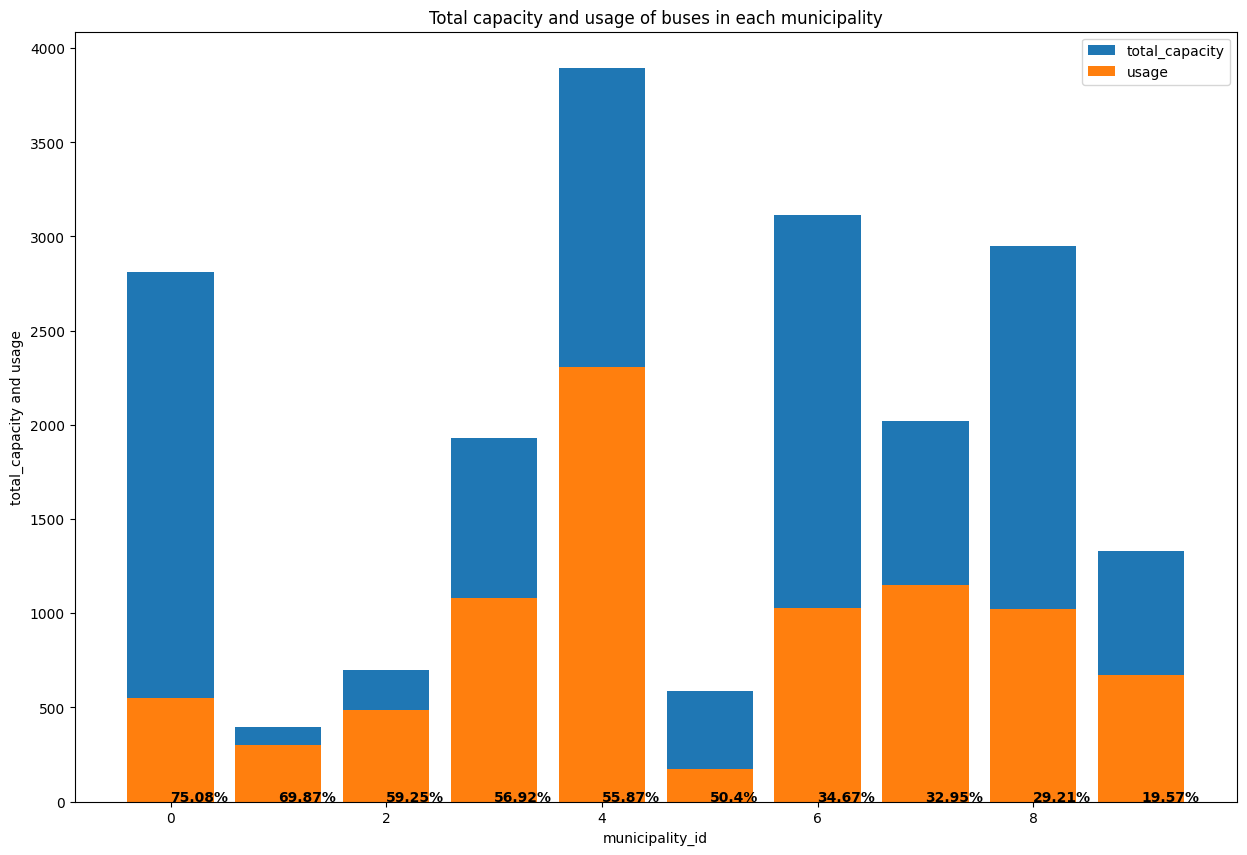

In [74]:
# group by municipality_id and aggregate the mean of usage and total_capacity. Also percentage of usage due to total capacity
usages_df = grouped_df.assign(usage_percentage=lambda x: x['usage']/x['total_capacity']*100).sort_values('usage_percentage', ascending=False)
display(usages_df)

# plot stacked chart for total_capacity and usage. Also write the percentage of usage due to total_capacity
fig, ax = plt.subplots(figsize=(15, 10))
ax.bar(usages_df.index, usages_df['total_capacity'], label='total_capacity')
ax.bar(usages_df.index, usages_df['usage'], label='usage')
ax.set_xlabel('municipality_id')
ax.set_ylabel('total_capacity and usage')
ax.set_title('Total capacity and usage of buses in each municipality')
ax.legend()
for i, v in enumerate(usages_df['usage_percentage']):
    ax.text(i, 0.5, str(round(v, 2)) + '%', color='black', fontweight='bold')
plt.show()
